In [49]:
import cv2
import numpy as np
import openvino.runtime as ov
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
model_path = r"D:/ml/code/anomalib/results/efficient_ad/mvtec/bottle/run/weights/openvino/model.onnx"

# opencv

In [66]:
model = cv2.dnn.readNetFromONNX(model_path)
model

< cv2.dnn.Net 0000026D16C93DF0>

In [67]:
x = np.ones((1, 3, 256, 256), dtype=np.float32)
x.dtype

dtype('float32')

In [68]:
model.setInput(x)

In [69]:
opencv_output = model.forward("output")
opencv_output.shape

(1, 1, 256, 256)

# openvino

In [70]:
core = ov.Core()
ov_model = core.read_model(model_path)
compiled_model = core.compile_model(ov_model, device_name="CPU")
compiled_model

<CompiledModel:
inputs[
<ConstOutput: names[input] shape[?,3,256,256] type: f32>
]
outputs[
<ConstOutput: names[output] shape[?,1,256,256] type: f32>,
<ConstOutput: names[onnx::Mul_276] shape[?,1,256,256] type: f32>,
<ConstOutput: names[onnx::Mul_281] shape[?,1,256,256] type: f32>
]>

In [71]:
compiled_model.outputs

[<ConstOutput: names[output] shape[?,1,256,256] type: f32>,
 <ConstOutput: names[onnx::Mul_276] shape[?,1,256,256] type: f32>,
 <ConstOutput: names[onnx::Mul_281] shape[?,1,256,256] type: f32>]

In [72]:
results = compiled_model([x])
results.keys()

dict_keys([<ConstOutput: names[output] shape[?,1,256,256] type: f32>, <ConstOutput: names[onnx::Mul_276] shape[?,1,256,256] type: f32>, <ConstOutput: names[onnx::Mul_281] shape[?,1,256,256] type: f32>])

In [73]:
openvino_result = results[compiled_model.outputs[0]]
openvino_result.shape

(1, 1, 256, 256)

# compare result

In [74]:
np.all(np.isclose(opencv_output, openvino_result))

False

In [75]:
opencv_output.min(), opencv_output.max(), opencv_output.mean(), opencv_output.std()

(-0.1011055, 2.4674466, 1.1373973, 0.91012156)

In [76]:
openvino_result.min(), openvino_result.max(), openvino_result.mean(), openvino_result.std()

(-0.1011055, 2.6016765, 1.3114308, 0.9183215)

<Axes: ylabel='Count'>

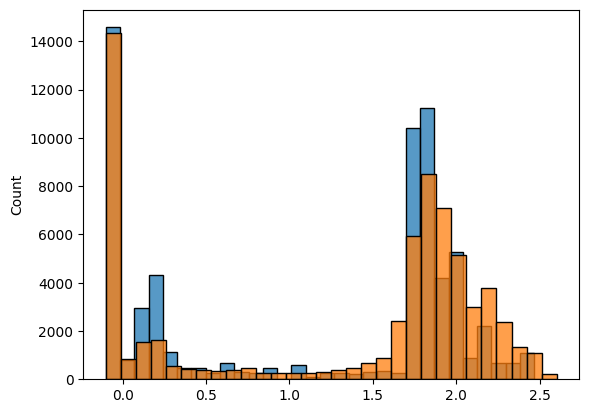

In [79]:
sns.histplot(opencv_output.reshape(-1))
sns.histplot(openvino_result.reshape(-1))